# Deep learning from scratch: homework 1, Kaiyuan Hou 2974802

### General instructions

Complete the exericse listed below in this Jupyter notebook - leaving all of your code in Python cells in the notebook itself.  Feel free to add any necessary cells.  

### When submitting this homework:

**Make sure you have put your name at the top of each file**
    
**Make sure all output is present in your notebook prior to submission**

**If possible please do not zip your files when uploading to canvas**

---

In [1]:
# import necessary library for this exercise
import autograd.numpy as np   
from autograd import value_and_grad 
import matplotlib.pyplot as plt

#### <span style="color:#a50e3e;">Exercise 5. </span>   Perform two-class classification on a breast cancer dataset

In this exercise you will repeat the experiment shown in [Section 9.4 of the class notes](https://jermwatt.github.io/mlrefined/blog_posts/8_Linear_regression/8_4_feature_scaling.html) comparing a run of gradient descent on standard and normalized data for two class classification using a real N=8 input breast cancer dataset, [a description of which you can find here](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original).  You should repeat this experiment precisely: including using the same number of steps for each run, the same steplength values and initializations, and by producing the same cost funciton / misclassification history plots for each run of gradient descent.  This dataset is loaded in the cell below.

In [2]:
# data input
data = np.loadtxt('breast_cancer_data.csv',delimiter = ',')

# get input and output of dataset
x = data[:,:-1].T
y = data[:,-1:] 

Note that you can find effecient `Python` implementations of both the softmax cost function [in Section 9.1.2](https://jermwatt.github.io/mlrefined/blog_posts/9_Linear_twoclass_classification/9_1_Logistic_regression.html) and the counting cost (for producing the number of misclassifications) [in Section 9.1.4](https://jermwatt.github.io/mlrefined/blog_posts/9_Linear_twoclass_classification/9_1_Logistic_regression.html) of the course notes.  Use these to produce both a plot of the cost function and misclassification count history for each run of gradient descent as shown in the example.

In [3]:
# Code form classnotes

# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha_choice,max_its,w):
    # compute the gradient function of our input function - note this is a function too
    # that - when evaluated - returns both the gradient and function evaluations (remember
    # as discussed in Chapter 3 we always ge the function evaluation 'for free' when we use
    # an Automatic Differntiator to evaluate the gradient)
    gradient = value_and_grad(g)

    # run the gradient descent loop
    weight_history = []      # container for weight history
    cost_history = []        # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
        
        # evaluate the gradient, store current weights and cost function value
        cost_eval,grad_eval = gradient(w)
        weight_history.append(w)
        cost_history.append(cost_eval)

        # take gradient descent step
        w = w - alpha*grad_eval
            
    # collect final weights
    weight_history.append(w)
    # compute final cost function value via g itself (since we aren't computing 
    # the gradient at the final step we don't get the final cost function value 
    # via the Automatic Differentiatoor) 
    cost_history.append(g(w))  
    return weight_history,cost_history

# compute linear combination of input point
def model(x,w):
    # tack a 1 onto the top of each input point all at once
    o = np.ones((1,np.shape(x)[1]))
    x = np.vstack((o,x))
    
    # compute linear combination and return
    a = np.dot(x.T,w)
    return a


In [4]:
# Linear classifier
def LC (_x, _y, a):
    # an implementation of the least squares cost function for linear regression
    # the convex softmax cost function
    def counting_cost(w):
        cost = np.sum((np.sign(model(_x, w)) - _y) ** 2)
        return 0.25 * cost 
    def softmax(w):
        cost = np.sum(np.log(1 + np.exp(-_y * model(_x, w))))
        return cost/float(len(_y))
    w = np.zeros((_x.shape[0] + 1, 1))
    h, l = gradient_descent(softmax, a, 100, w)
    cl = [counting_cost(t) for t in h]
    return h, l, cl


In [5]:
# Normalize data

def standard_normalizer(x):
    # compute the mean and standard deviation of the input
    x_means = np.mean(x,axis = 1)[:,np.newaxis]
    x_stds = np.std(x,axis = 1)[:,np.newaxis]   

    # create standard normalizer function based on input data statistics
    normalizer = lambda data: (data - x_means)/x_stds
    
    # return normalizer and inverse_normalizer
    return normalizer, x_means, x_stds
# return normalization functions based on input x
normalizer, mean, stddev = standard_normalizer(x)

# normalize input by subtracting off mean and dividing by standard deviation
nx = normalizer(x)


In [6]:
# Run classifier
h, l, cl = LC(x, y, 0.1)
nh, nl, ncl = LC(nx, y, 0.1)

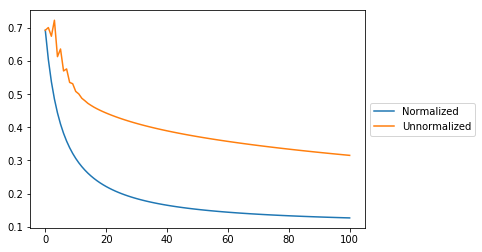

In [7]:
# Plot cost function history plot
itr = range(len(l))
plt.plot(itr, nl)
plt.plot(itr, l)
plt.legend(['Normalized', 'Unnormalized'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()



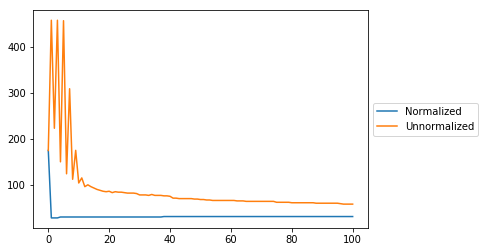

In [8]:
# Plot misclassification history plot
itr = range(len(l))
plt.plot(itr, ncl)
plt.plot(itr, cl)
plt.legend(['Normalized', 'Unnormalized'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

